# Image import and Preprocessing
#### In this cell we import the images and do preprocessing of these images and display it
#### The following is done in this cell: 
- Import Tiff-file 
- Choose what frame you want to display and analyze 
- Print metadata
- Display original frame, as well as processed frames
- Display histogram intensity data 

Number of total frames: 392
Metadata for Frame 201 of 392
256: TiffTag 256 ImageWidth @2218836824 LONG8 @2218836836 = 2560
257: TiffTag 257 ImageLength @2218836844 LONG8 @2218836856 = 2160
258: TiffTag 258 BitsPerSample @2218836864 SHORT @2218836876 = 16
259: TiffTag 259 Compression @2218836884 SHORT @2218836896 = NONE
262: TiffTag 262 PhotometricInterpretation @2218836904 SHORT @2218836916 = MINISBLAC
270: TiffTag 270 ImageDescription @2218836924 ASCII[66] @2218837152 = ImageJ= hypers
273: TiffTag 273 StripOffsets @2218836944 LONG8[2160] @2218837218 = (2218871800, 221
277: TiffTag 277 SamplesPerPixel @2218836964 SHORT @2218836976 = 1
278: TiffTag 278 RowsPerStrip @2218836984 LONG8 @2218836996 = 1
279: TiffTag 279 StripByteCounts @2218837004 LONG8[2160] @2218854498 = (5120, 5120, 
282: TiffTag 282 XResolution @2218837024 RATIONAL @2218837036 = (61538461, 1000)
283: TiffTag 283 YResolution @2218837044 RATIONAL @2218837056 = (61538461, 1000)
284: TiffTag 284 PlanarConfiguration @22188370

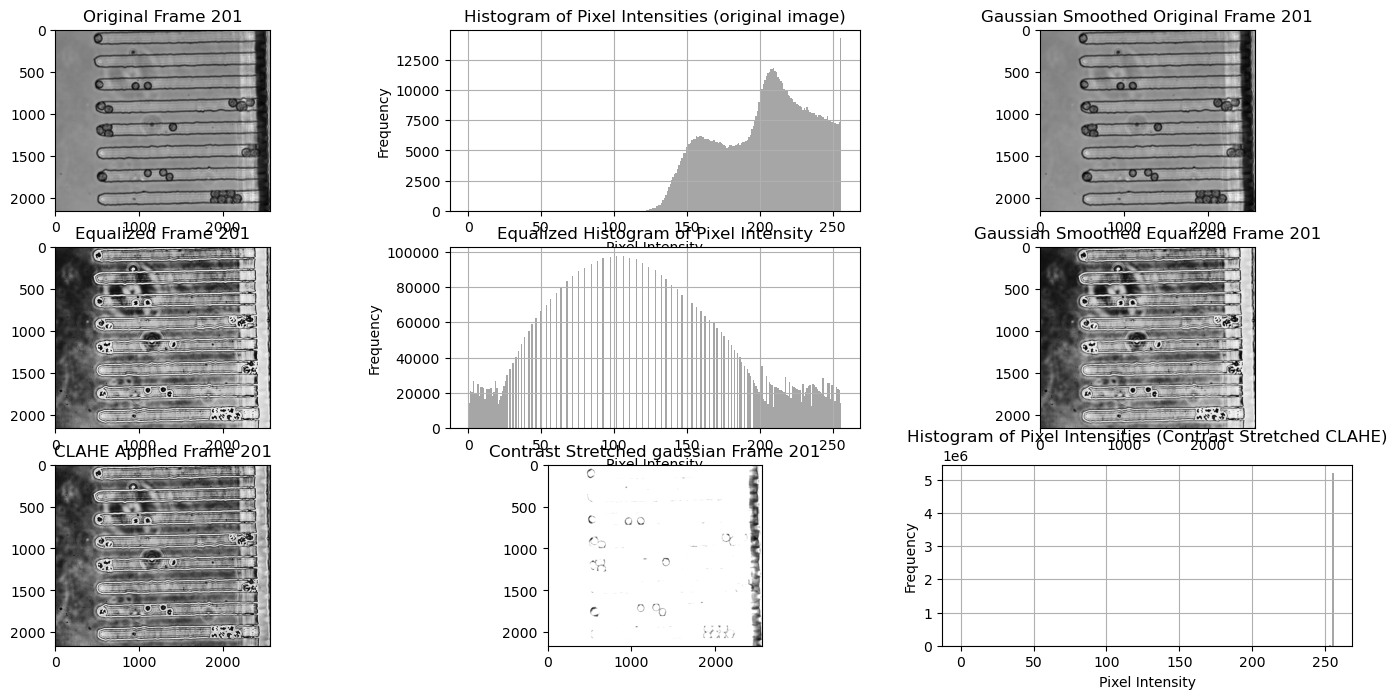

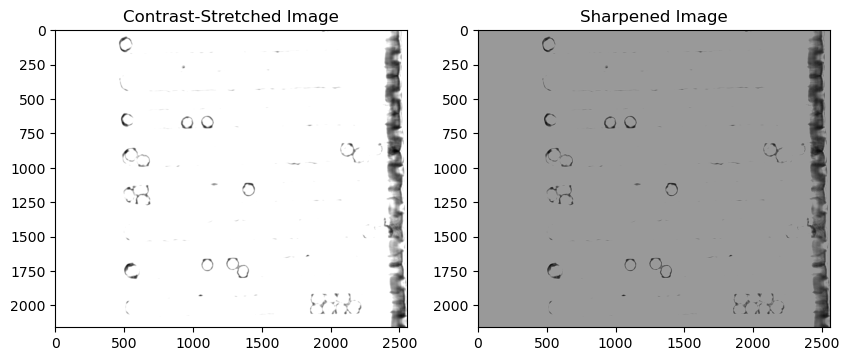

<Figure size 640x480 with 0 Axes>

In [128]:
import tifffile
import matplotlib.pyplot as plt
import numpy as np
import cv2

# Open the TIFF image file
with tifffile.TiffFile("C:/Users/micha/Desktop/Master_Project/tiff_file_converted.tiff") as tif:
    num_frames = len(tif.pages)
    print(f'Number of total frames: {num_frames}')  # Total number of frames in the tiff-file

    # Frame you want to display visually and metadata from
    frame_to_display = 200

    tiff_data = tif.asarray(key=frame_to_display)  # extract specific frame

    # Print metadata for the current frame
    print(f"Metadata for Frame {frame_to_display + 1} of {num_frames}")
    page = tif.pages[frame_to_display]
    for tag, value in page.tags.items():
        tag_name = str(tag)
        print(f"{tag_name}: {value}")

    print("-" * 50)  # Add a separator between frames

    # Create a 3x3 grid of subplots
    fig, axs = plt.subplots(3, 3, figsize=(18, 8))

    # Display the chosen frame
    axs[0, 0].imshow(tiff_data, cmap='gray')
    axs[0, 0].set_title(f"Original Frame {frame_to_display + 1}")

    # Calculate and display the histogram
    axs[0, 1].hist(tiff_data.flatten(), bins=256, range=(0, 256), color='gray', alpha=0.7)
    axs[0, 1].set_xlabel('Pixel Intensity')
    axs[0, 1].set_ylabel('Frequency')
    axs[0, 1].set_title('Histogram of Pixel Intensities (original image)')
    axs[0, 1].grid(True)

    # Apply Gaussian noise reduction to the original frame
    smoothed_original_image = cv2.GaussianBlur(tiff_data, (9, 9), 0)  # Adjust kernel size (5, 5) as needed
    axs[0, 2].imshow(smoothed_original_image, cmap='gray')
    axs[0, 2].set_title(f"Gaussian Smoothed Original Frame {frame_to_display + 1}")

    # Perform histogram equalization
    if tiff_data.shape[-1] == 3:
        tiff_data = cv2.cvtColor(tiff_data, cv2.COLOR_BGR2GRAY)

    # Ensure the image is of the correct data type (CV_8UC1)
    if tiff_data.dtype != np.uint8:
        tiff_data = tiff_data.astype(np.uint8)

    equalized_image = cv2.equalizeHist(tiff_data)

    # Display the equalized image
    axs[1, 0].imshow(equalized_image, cmap='gray')
    axs[1, 0].set_title(f"Equalized Frame {frame_to_display + 1}")

    # Calculate and display the equalized histogram
    axs[1, 1].hist(equalized_image.flatten(), bins=256, range=(0, 256), color='gray', alpha=0.7)
    axs[1, 1].set_xlabel('Pixel Intensity')
    axs[1, 1].set_ylabel('Frequency')
    axs[1, 1].set_title('Equalized Histogram of Pixel Intensity')
    axs[1, 1].grid(True)

    # Apply Gaussian noise reduction
    smoothed_image = cv2.GaussianBlur(equalized_image, (15, 15), 0)  # Adjust kernel size (5, 5) as needed
    axs[1, 2].imshow(smoothed_image, cmap='gray')
    axs[1, 2].set_title(f"Gaussian Smoothed Equalized Frame {frame_to_display + 1}")

    # Apply CLAHE (Contrast Limited Adaptive Histogram Equalization)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    clahe_image = clahe.apply(equalized_image)
    axs[2, 0].imshow(clahe_image, cmap='gray')
    axs[2, 0].set_title(f"CLAHE Applied Frame {frame_to_display + 1}")

    # Apply Contrast Stretching
    def pixelVal(pix, r1, s1, r2, s2):
        if 0 <= pix <= r1:
            return (s1 / r1) * pix
        elif r1 < pix <= r2:
            return ((s2 - s1) / (r2 - r1)) * (pix - r1) + s1
        else:
            return ((255 - s2) / (255 - r2)) * (pix - r2) + s2

    pixelVal_vec = np.vectorize(pixelVal)
    contrast_stretched = pixelVal_vec(smoothed_original_image, 70, 0, 200, 255)
    axs[2, 1].imshow(contrast_stretched, cmap='gray')
    axs[2, 1].set_title(f"Contrast Stretched gaussian Frame {frame_to_display + 1}")

    # Calculate and display the contrast stretched histogram
    axs[2, 2].hist(contrast_stretched.flatten(), bins=256, range=(0, 256), color='gray', alpha=0.7)
    axs[2, 2].set_xlabel('Pixel Intensity')
    axs[2, 2].set_ylabel('Frequency')
    axs[2, 2].set_title('Histogram of Pixel Intensities (Contrast Stretched CLAHE)')
    axs[2, 2].grid(True)
    
    
        # Apply sharpening using a kernel
    kernel = np.array([[-1, -1, -1],
                       [-1,  9, -1],
                       [-1, -1, -1]])

    sharpened_image = cv2.filter2D(contrast_stretched, -1, kernel)

    # Display the original and sharpened images
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(contrast_stretched, cmap='gray')
    plt.title('Contrast-Stretched Image')

    plt.subplot(1, 2, 2)
    plt.imshow(sharpened_image, cmap='gray')
    plt.title('Sharpened Image')

    plt.show()

# Adjust layout for better spacing
plt.tight_layout()

    # Show the plots
plt.show()
    
    
    



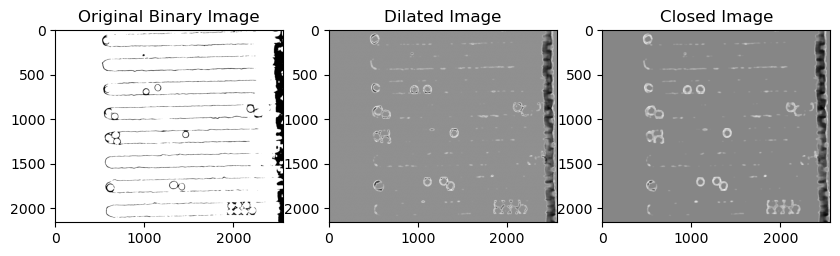

In [129]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load your binary image
# Assuming 'thresh_original' is your binary image
# Replace this with your actual binary image variable
# thresh_original = ...

# Apply dilation to fill in small gaps
kernel_dilate = np.ones((8, 8), np.uint8)
dilated_image = cv2.dilate(sharpened_image, kernel_dilate, iterations=1)

# Apply closing to further fill in gaps and smooth the outlines
kernel_close = np.ones((15, 15), np.uint8)
closed_image = cv2.morphologyEx(dilated_image, cv2.MORPH_CLOSE, kernel_close)

# Display the results
plt.figure(figsize=(10, 5))

plt.subplot(131), plt.imshow(thresh_original, cmap='gray'), plt.title('Original Binary Image')
plt.subplot(132), plt.imshow(dilated_image, cmap='gray'), plt.title('Dilated Image')
plt.subplot(133), plt.imshow(closed_image, cmap='gray'), plt.title('Closed Image')

plt.show()


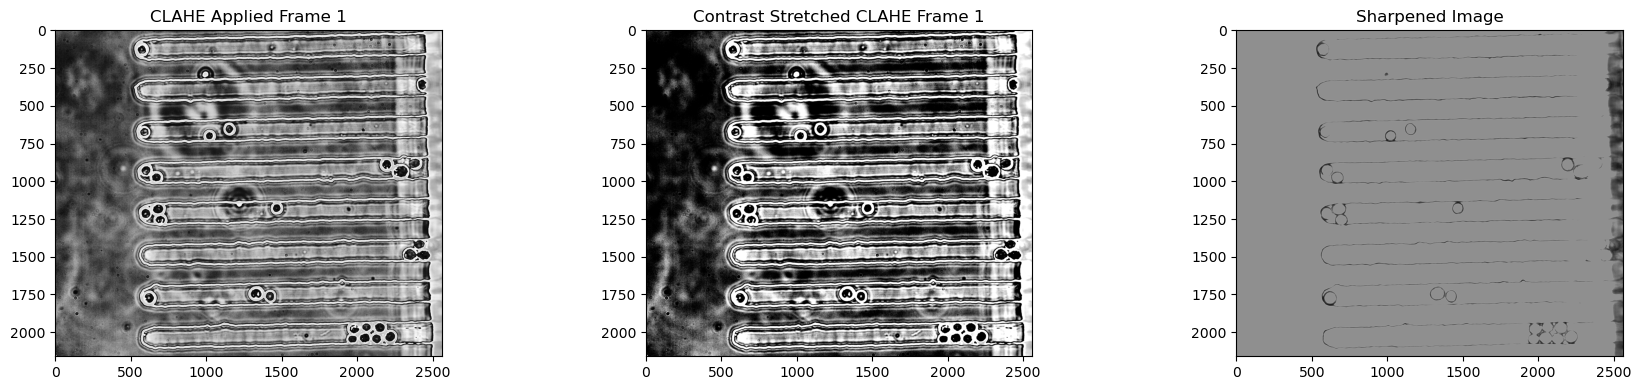

In [113]:
# Create a new subplot grid for contrast-stretched CLAHE and sharpened images
fig, axs_combined = plt.subplots(1, 3, figsize=(18, 4))

# Apply Contrast Stretching to the CLAHE image
contrast_stretched_clahe = pixelVal_vec(clahe_image, 70, 0, 200, 255)
axs_combined[0].imshow(clahe_image, cmap='gray')
axs_combined[0].set_title(f"CLAHE Applied Frame {frame_to_display + 1}")

# Display the contrast-stretched CLAHE image
axs_combined[1].imshow(contrast_stretched_clahe, cmap='gray')
axs_combined[1].set_title(f"Contrast Stretched CLAHE Frame {frame_to_display + 1}")

# Apply sharpening using a kernel
kernel = np.array([[-1, -1, -1],
                   [-1,  9, -1],
                   [-1, -1, -1]])

sharpened_image = cv2.filter2D(contrast_stretched, -1, kernel)
axs_combined[2].imshow(sharpened_image, cmap='gray')
axs_combined[2].set_title('Sharpened Image')

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()


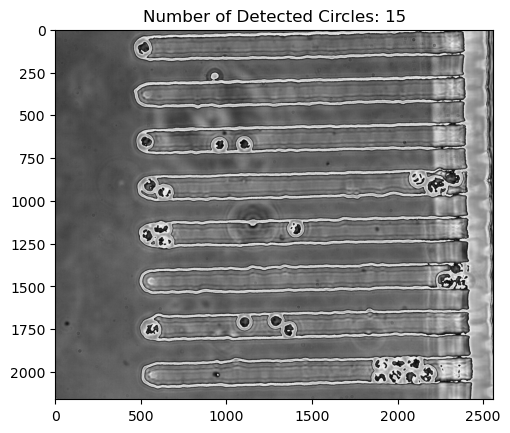

Number of Detected Circles: 15


In [130]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assuming you already have tiff_data and contrast_stretched from the previous cells

# Convert the contrast-stretched image to 8-bit unsigned integer
contrast_stretched_image = sharpened_image.astype(np.uint8)

# Apply Gaussian blur to the original image for better cell segmentation
blurred_original = cv2.GaussianBlur(closed_image, (5, 5), 0)


blurred_original = cv2.convertScaleAbs(blurred_original)

# Apply adaptive thresholding to segment cells
_, thresh_original = cv2.threshold(blurred_original, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

# Use Hough Circle Transform to detect circles with a higher minimum distance
circles = cv2.HoughCircles(
    image=thresh_original,
    method=cv2.HOUGH_GRADIENT,
    dp=1,
    minDist=5,  # Increased minimum distance to reduce overlapping circles
    param1=80,   # Higher value for canny edge detection
    param2=30,   # Accumulator threshold for circle detection
    minRadius=10, # Minimum radius of the circles
    maxRadius=170  # Maximum radius of the circles
)

# Draw the detected circles on the original image
result_image_original = cv2.cvtColor(tiff_data, cv2.COLOR_GRAY2BGR)

if circles is not None:
    circles = np.uint16(np.around(circles))

       # Filter out overlapping circles
    non_overlapping_circles = []

    for i in range(len(circles[0])):
        current_circle = circles[0][i]
        current_center = (current_circle[0], current_circle[1])
        current_radius = current_circle[2]

        # Assume the current circle doesn't overlap with any existing circles
        overlap = False

        for j in range(len(non_overlapping_circles)):
            other_circle = non_overlapping_circles[j]
            other_center = (other_circle[0], other_circle[1])
            other_radius = other_circle[2]

            # Calculate the distance between circle centers
            distance = np.linalg.norm(np.array(current_center) - np.array(other_center))

            # Check if circles overlap (considering both circles' radii)
            if distance < current_radius + other_radius:
                overlap = True
                break

        # If the current circle doesn't overlap, add it to the list
        if not overlap:
            non_overlapping_circles.append(current_circle)

    # Draw non-overlapping circles
    for circle in non_overlapping_circles:
        # Draw the outer circle
        cv2.circle(result_image_original, (circle[0], circle[1]), circle[2], (0, 255, 0), 2)
        # Draw the center of the circle
        cv2.circle(result_image_original, (circle[0], circle[1]), 2, (0, 0, 255), 3)

    # Count the number of detected circles
    num_cells_original = len(non_overlapping_circles)


# Display the result
plt.imshow(result_image_original)
plt.title(f"Number of Detected Circles: {num_cells_original}")
plt.show()

print(f"Number of Detected Circles: {num_cells_original}")
